# 1 判断模型好坏
#### 使用训练数据集和测试数据集来判断模型的好坏，给出并实现accurcay这一分类问题常用指标。最后我们再探寻超参数的选择对模型的影响

## 1.1 训练数据集&测试数据集
#### 将原始数据中的一部分作为训练数据、另一部分作为测试数据。使用训练数据训练模型，再用测试数据看好坏。即通过测试数据判断模型好坏，然后再不断对模型进行修改。

## 1.2 鸢尾花train_test

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 方法1# 使用concatenate函数进行拼接，因为传入的矩阵必须具有相同的形状。因此需要对label进行reshape操作，reshape(-1,1)表示行数自动计算，1列。axis=1表示纵向拼接。
tempConcat = np.concatenate((X, y.reshape(-1,1)), axis=1)
# 拼接好后，直接进行乱序操作
np.random.shuffle(tempConcat)
# 再将shuffle后的数组使用split方法拆分
shuffle_X,shuffle_y = np.split(tempConcat, [4], axis=1)
# 设置划分的比例
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
X_train = shuffle_X[test_size:]
y_train = shuffle_y[test_size:]
X_test = shuffle_X[:test_size]
y_test = shuffle_y[:test_size]

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [9]:
# 方法2# 将x长度这么多的数，返回一个新的打乱顺序的数组，注意，数组中的元素不是原来的数据，而是混乱的索引
shuffle_index = np.random.permutation(len(X))
# 指定测试数据的比例
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_index = shuffle_index[:test_size]
train_index = shuffle_index[test_size:]
X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]

In [10]:
from model_selections import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 1.3 Train_test_split

In [13]:
from kNN import kNNClassifier
my_kNNClassifier = kNNClassifier(k=3)
my_kNNClassifier.fit(X_train, y_train)
y_predict = my_kNNClassifier.predict(X_test)

In [14]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y_test

array([0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 2, 0, 1])

In [16]:
# 两个向量的比较，返回一个布尔型向量，对这个布尔向量（false=0，true=1）sum，
sum(y_predict == y_test)

9

In [17]:
sum(y_predict == y_test)/len(y_test)

0.3

## 1.4 sklearn中的train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# 2 分类准确度

## 2.1数据探索

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# 手写数字数据集，封装好的对象，可以理解为一个字段
digits = datasets.load_digits()
# 可以使用keys()方法来看一下数据集的详情
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [23]:
# 5620张图片，每张图片有64个像素点即特征（8*8整数像素图像），每个特征的取值范围是1～16（sklearn中的不全），对应的分类结果是10个数字
print(digits.DESCR[:550])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritte


In [24]:
# 特征的shape
X = digits.data
X.shape

(1797, 64)

In [25]:
# 标签分类
y = digits.target
y.shape

(1797,)

In [26]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
# 去除某一个具体的数据，查看其特征以及标签信息
some_digit = X[666]
some_digit

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [28]:
y[666]

0

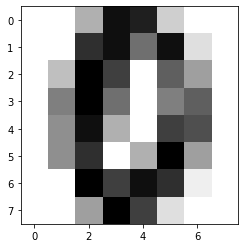

In [29]:
# 也可以这条数据进行可视化
some_digmit_image = some_digit.reshape(8, 8)
plt.imshow(some_digmit_image, cmap=matplotlib.cm.binary)
plt.show()

## 2.2 自己实现分类准确度

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
# 比对y_predict和y_test结果是否一致
sum(y_predict == y_test) / len(y_test)
#0.9955555555555555

0.9933333333333333

In [31]:
y_test.shape[0]

450

In [32]:
y_predict.shape[0]

450

In [33]:
from metrics import * 

In [34]:
accuracy_score(y_test, y_predict)

0.9933333333333333

## 2.3 sklearn中的准确度

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9888888888888889

In [36]:
# 不看y_predict
knn_clf.score(X_test,y_test)

0.9888888888888889

# 3 超参数

## 3.1 超参数简介

In [37]:
# 指定最佳值的分数，初始化为0.0；设置最佳值k，初始值为-1
best_score = 0.0
best_k = -1
for k in range(1, 11):  # 暂且设定到1～11的范围内
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)    
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  4
best_score =  0.9916666666666667


#### 在 sklearn.neighbors 的构造函数 KNeighborsClassifier 中有一个参数：weights，默认是uniform即不考虑距离，也可以写distance来考虑距离权重(默认是欧拉距离，如果要是曼哈顿距离，则可以写参数p（明可夫斯基距离的参数），这个也是超参数)

In [38]:
# 两种方式进行比较
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform","distance"]:    
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method, p=2)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)        
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_method = ", method)
print("best_k = ", best_k)
print("best_score = ", best_score)

best_method =  distance
best_k =  4
best_score =  0.9916666666666667


In [39]:
param_search = [
    {        "weights":["uniform"],        "n_neighbors":[i for i in range(1,11)]
    },
    {        "weights":["distance"],        "n_neighbors":[i for i in range(1,11)],        "p":[i for i in range(1,6)]
    }
]

In [40]:
knn_clf = KNeighborsClassifier()
# 调用网格搜索方法
from sklearn.model_selection import GridSearchCV
# 定义网格搜索的对象grid_search，其构造函数的第一个参数表示对哪一个分类器进行算法搜索，第二个参数表示网格搜索相应的参数
grid_search = GridSearchCV(knn_clf, param_search)

In [41]:
%%time
grid_search.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 2min 25s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)